<a href="https://colab.research.google.com/github/Himagination/TensorFlow_Developer/blob/main/02_NN_Classification_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Typical Architecture of Neural Network Classification problems.

* Input Layer Shape: Same as number of features
* Hidden Layer(s): Problem Specific, minimum=1, maximum=unlimited
* Neurons per Hidden layer: Problem specific, generally 10-100
* Output layer shape: 1(one class or the other), 1 per class for multiclass classification
* Hidden activation: Usually ReLU
* Output activation: Sigmoid, Softmax(For multiclass)
* Loss Function: Cross entropy
* Optimizer: SGD, Adam

# Introduction

A Classification is where you try to classify something as one thing or another.
* Binary Classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit.

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [2]:
# Check Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


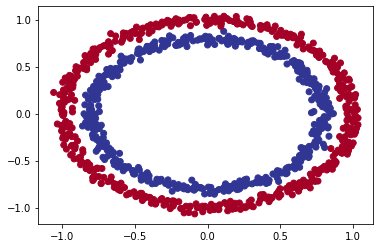

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes of our features and labels

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working on
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [10]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classsification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1),
                                tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010


## Improving our model

1. Create a model: we might add more layers or increase the number of hidden units within a layer.
2. Compile the model: We can choose different optimization function such as Adam instead of SGD.
3. Fitting a model: We might fit our model for more epochs

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), 
                               tf.keras.layers.Dense(10), 
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

**As the model is not improving by altering the numnber of layers or number of units or optimizer, let's visualize our prediction to get a better idea.**

Let's create a function plot_decision_boundary(), this function will:
* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different x values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones(where each unique class falls)

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclassification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing Binary Classification


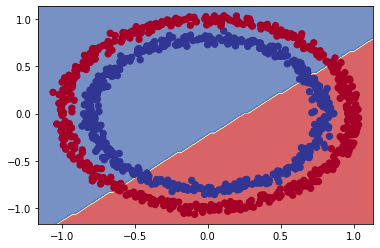

In [14]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, 
                       X=X,
                       y=y)

**NON-LINEARITY is the key**

Let's try to build a neural network with non-linear activation function

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [16]:
# Replicate model from TensorFlow playground

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(1, activation='sigmoid') 
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=['accuracy'])

# 3. Fit the model

history = model_6.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [17]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9960


[0.019344110041856766, 0.9959999918937683]

Doing Binary Classification


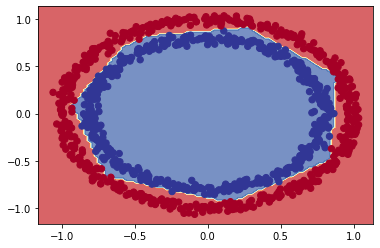

In [18]:
# Visualize model predictions
plot_decision_boundary(model_6, X, y)

In [19]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

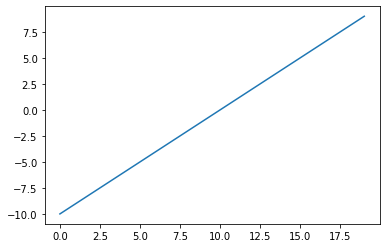

In [20]:
# Visualize toy tensor
plt.plot(A)

In [21]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1+exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

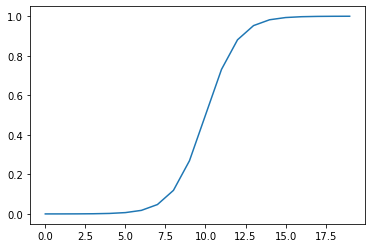

In [22]:
# Visualize our toy tensor transformed by sigmoid

plt.plot(sigmoid(A));

In [23]:
# Let's recreate the relu function

def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

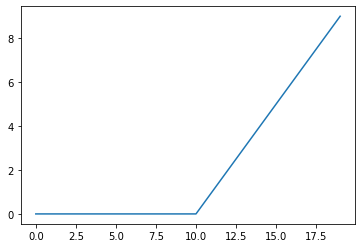

In [24]:
plt.plot(relu(A))

## Evaluating and improving our classification model

So far we have been training and testing on the same dataset. However its not the correct way. So let's create training and test set.

In [25]:
# Split into train and test set

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [26]:
# Let's recreate a model to fit on training data and evaluate on test data

tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [27]:
# Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Doing Binary Classification
Doing Binary Classification


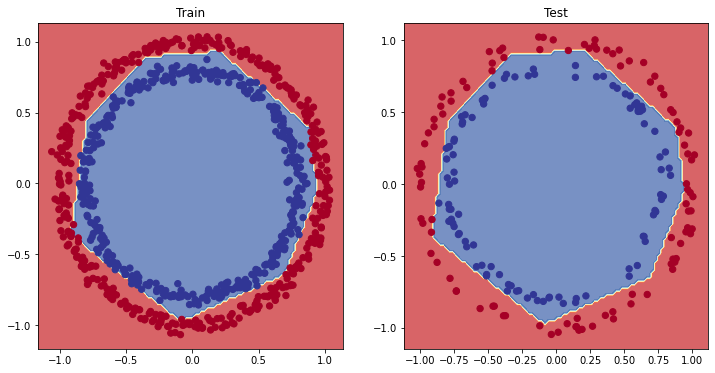

In [28]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

## Plot the loss curves

In [29]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_7 loss curves')

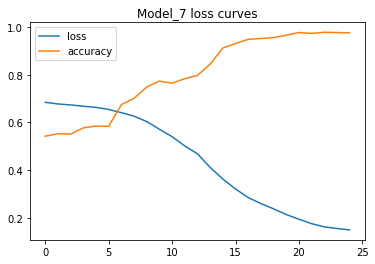

In [30]:
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

## Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the modt during training) we are going to use the following steps:

* A learning rate **callback** can be thought as an extra functionality we can add to our model while its training.

In [31]:
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

# Define a LearningRateScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_8 = model_8.fit(X_train, 
                        y_train, 
                        epochs=100, 
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

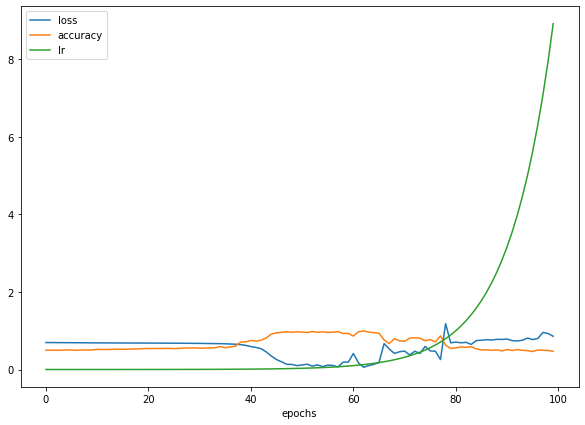

In [32]:
# Checkout the history
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel='epochs')

In [33]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
lrs, len(lrs)

(<tf.Tensor: shape=(100,), dtype=float64, numpy=
 array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
        1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
        2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
        3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
        6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
        1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
        1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
        2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
        3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
        6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
        1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
        1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
        2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
        3.98107

Text(0, 0.5, 'Loss')

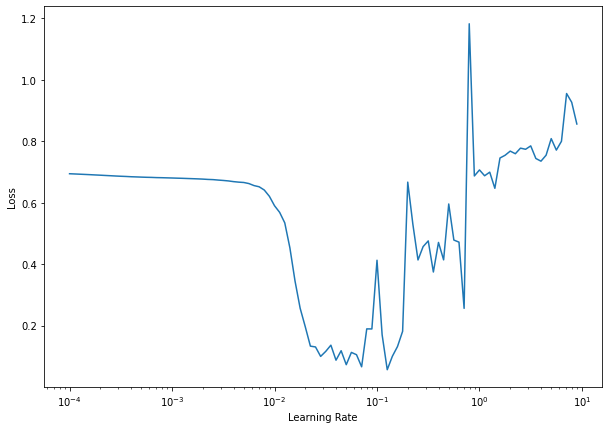

In [34]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_8.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [35]:
# Let's try using a higher **ideal** learning rate with the same model

tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(4, activation='relu'), 
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), 
                metrics=['accuracy'])

# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [36]:
# Evaluate model_9 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Doing Binary Classification
Doing Binary Classification


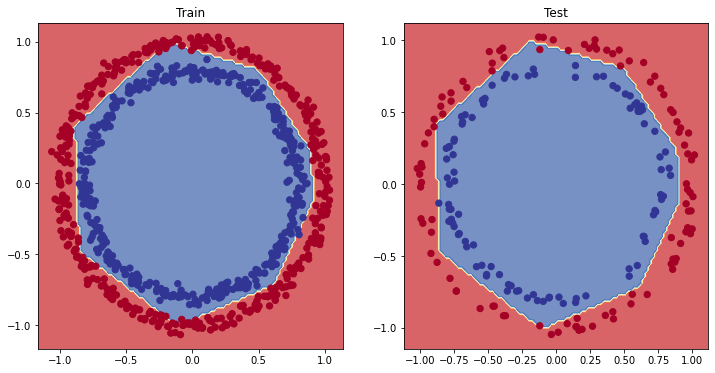

In [37]:
# Plot the decision boundary for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_9, X=X_test, y=y_test)

## Classification Evaluation Methods

1. Accuracy: (tp + tn)/(tp + tn + fp + fn). Default metric for classification problems. Not the best for imbalanced classes.

2. Precision: tp / (tp + fp). Higher precision leads to less false positives.

3. Recall: tp / (tp + fn). Higher recall leads to less false negatives.

4. F1-score: 2*(precision-recall)/(precision+recall). Combination of precision and recall, usually a good overall metric for a classification model.

In [38]:
# Check accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


## Confusion Matrix

In [39]:
# Convert prediction probabilities to binary format and view the first 1
y_preds = model_9.predict(X_test)
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [41]:
from sklearn.metrics import confusion_matrix

y_preds = model_9.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

### How about we prettify our confusion matrix?

Scikit learn's plot_confusion_matrix works only with estimators i.e only with scikit learn models. In order to use it with tensorflow, we need some tweaking.

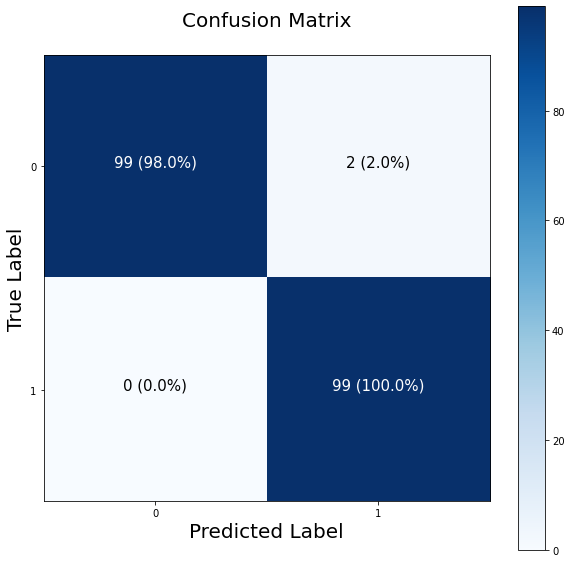

In [43]:
import itertools

figsize=(10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix", 
       xlabel="Predicted Label", 
       ylabel="True Label", 
       xticks=np.arange(n_classes), 
       yticks=np.arange(n_classes), 
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
           horizontalalignment='center', 
           color='white' if cm[i, j] > threshold else 'black', 
           size=15)
  

In [68]:
# Create a function for confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix", 
       xlabel="Predicted Label", 
       ylabel="True Label", 
       xticks=np.arange(n_classes), 
       yticks=np.arange(n_classes), 
       xticklabels=labels, 
       yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
           horizontalalignment='center', 
           color='white' if cm[i, j] > threshold else 'black', 
           size=text_size)
  

# Working with larger example(Multiclass Classification)

When you have more than 2 classes an option it is known as **Multi-class classification**.
* It means, if we have 3 different classes, its multi-class classification.
* It also means, if we have 100 different classes, its also multi-class classification.

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothing.


In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been already sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [45]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label;\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [46]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

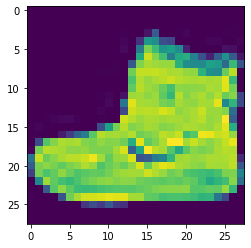

In [47]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [48]:
train_labels[0]

9

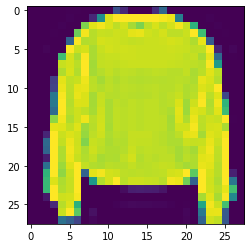

In [49]:
plt.imshow(train_data[7]);

In [50]:
train_labels[7]

2

In [51]:
# Create a small list to index onto our taining labels so they are human readable

class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

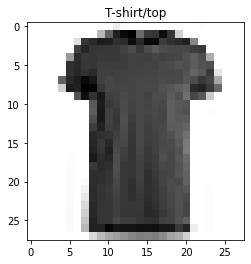

In [52]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_name[train_labels[17]])

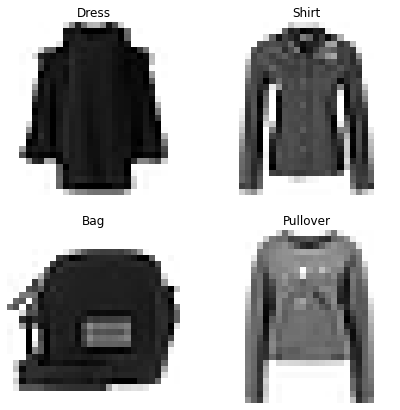

In [55]:
# Plot random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])  
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:
* Input shape = 28 X 28( the shape of one image)
* Output shape = 10(one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use tf.keras.losses.categorical_crossentropy.
  * If your labels are integer form use use tf.keras.losses.sparse_categorical_crossentropy
* Output layer activation = Softmax(not sigmoid)

In [59]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [60]:
# Check model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Network prefer data to be scaled (or normalized), this means they like to have the numbers in between 0 & 1.

In [62]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum value.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [63]:
# Now our data is normalized, let's build a model to find patterns in it.
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

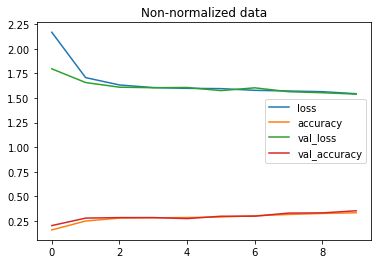

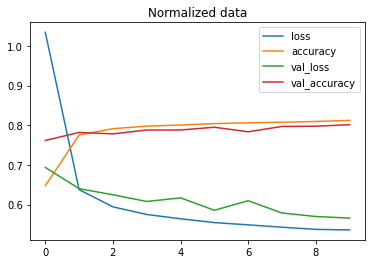

In [64]:
import pandas as pd
# Plot non-normalied data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [65]:
tf.random.set_seed(42)

# Create Model
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model

model_13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])
# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
lr_history = model_13.fit(train_data_norm, 
                          train_labels, 
                          epochs=40, 
                          validation_data=(test_data_norm, test_labels), 
                          callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

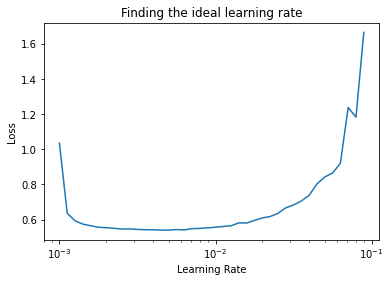

In [66]:
# Plot the learning rate decay
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

Ideal learning rate in our case is 0.001, which is the default value of Adam in tensorflow.

In [67]:
# Create the model using ideal learning rate

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(4, activation='relu'), 
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                 metrics=['accuracy'])

history_14 = model_14.fit(train_data_norm, 
             train_labels, 
             epochs=20, 
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7063 - accuracy: 0.7535 - val_loss: 0.6690 - val_accuracy: 0.7627
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6184 - accuracy: 0.7861 - val_loss: 0.6178 - val_accuracy: 0.7841
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5817 - accuracy: 0.7986 - val_loss: 0.5948 - val_accuracy: 0.7950
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.5959 - val_accuracy: 0.7876
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.5637 - val_accuracy: 0.8024
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5350 - accuracy: 0.8119 - val_loss: 0.5496 - val_accuracy:

## Evaluating multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics(such as confusion matrix)
* Assess some of its predictions(through visualizations)
* Improve its results (by training it for longer or changing the architecture.)
* Save and eport it for use in application.

In [69]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

array([[8.1524879e-05, 3.3946582e-15, 3.2584551e-06, 3.6896888e-09,
        8.8288123e-09, 2.3563351e-01, 6.8518573e-05, 3.7959840e-02,
        2.6363390e-03, 7.2361696e-01],
       [7.4670801e-04, 2.3221060e-11, 9.2823875e-01, 4.8261899e-07,
        1.0543334e-02, 1.4094655e-19, 6.0464900e-02, 1.7447401e-32,
        5.7704037e-06, 2.0923552e-13],
       [8.6239822e-08, 9.9879766e-01, 1.2734928e-06, 3.3866811e-05,
        1.1610916e-03, 5.2064361e-18, 4.7804720e-06, 3.9381653e-22,
        1.2669732e-06, 3.3702169e-20],
       [9.3152939e-06, 9.9333292e-01, 5.2955824e-05, 1.9811240e-03,
        4.5198733e-03, 6.9245621e-16, 9.9925499e-05, 1.4175559e-18,
        3.8867006e-06, 2.9157709e-16],
       [1.5497896e-01, 2.0924113e-06, 1.8395236e-01, 7.5024809e-03,
        4.0799249e-02, 8.0380757e-14, 6.0850447e-01, 1.6854876e-16,
        4.2604199e-03, 1.0498662e-08]], dtype=float32)

In [70]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

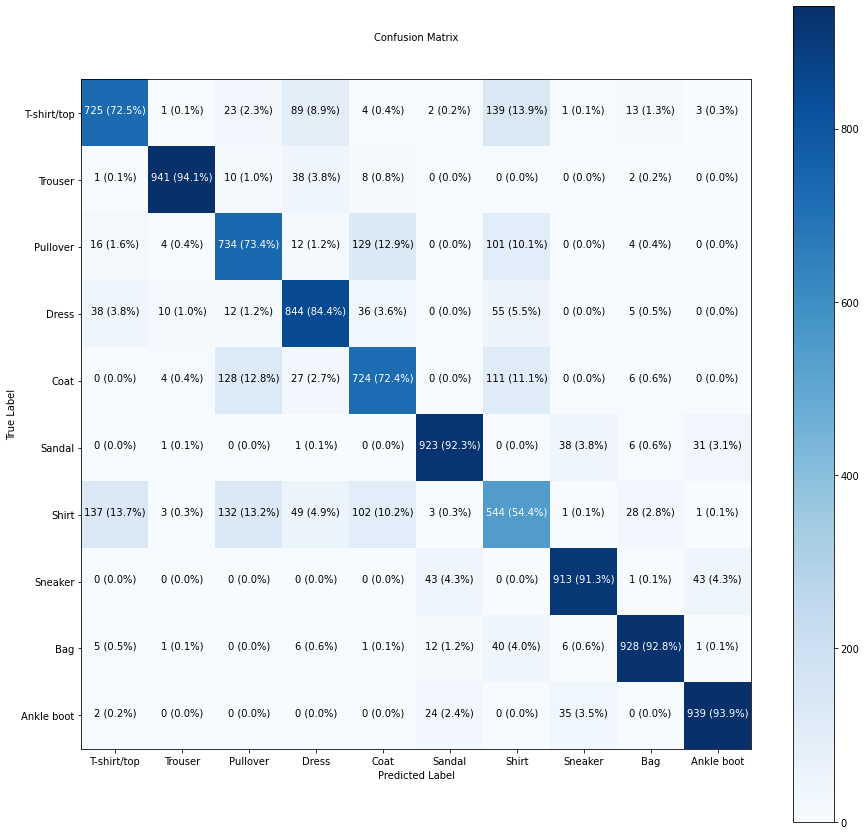

In [71]:
# Create a confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds, 
                      classes=class_name, 
                      figsize=(15, 15), 
                      text_size=10)

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [74]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plot it and label it with a prediction and truth label.
  """

  # Set up a random integer
  i = random.randint(0, len(images))
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information(prediction/true label)
  plt.xlabel(f"Pred: {pred_label}, {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", 
             color=color)

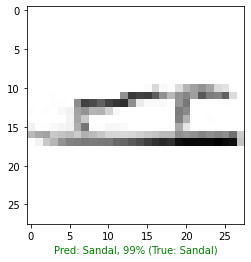

In [83]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_name)

## What patterns is our model learning?

In [84]:
# Find the layers of our most recent model
model_14.layers

In [85]:
# Extract a particular layer
model_14.layers[1]

In [86]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape

(array([[ 0.7946614 , -0.53290087,  0.52827364, -0.507869  ],
        [ 0.655714  , -0.93787146, -0.03041612,  0.0205443 ],
        [ 0.97588533, -0.5097972 , -0.15114643, -0.35570493],
        ...,
        [ 0.59827894,  0.73360926, -0.25218114, -0.5898735 ],
        [ 0.34780756,  0.27296326,  0.31235895, -0.5814659 ],
        [ 0.7829906 ,  0.12814343, -0.6544624 , -0.2580599 ]],
       dtype=float32), (784, 4))

In [87]:
biases, biases.shape

(array([0.7101353 , 0.3618726 , 0.6050529 , 0.66153586], dtype=float32), (4,))

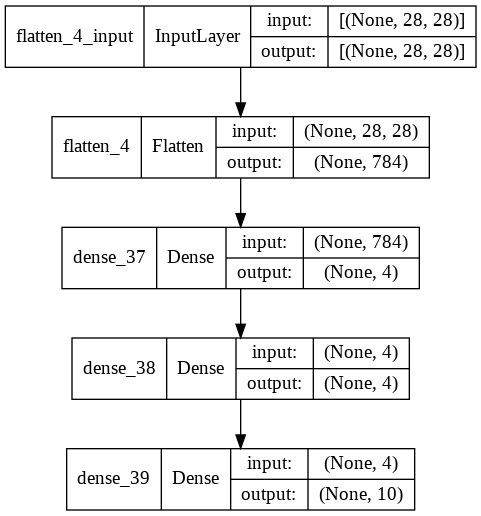

In [88]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)